In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
Data=[[[(i+j)/100] for i in range(5)] for j in range(100)]

AttributeError: 'list' object has no attribute 'shape'

In [5]:
Target=[(i+5)/100 for i in range(100)]
Target[:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [6]:
data=np.array(Data,dtype=float)
target=np.array(Target,dtype=float)

In [15]:
data.shape, target.shape

((100, 5, 1), (100,))

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target, test_size=0.2, random_state=3)

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=False))


In [ ]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [49]:
history=model.fit(xtrain,ytrain,epochs=1500,validation_data=(xtest,ytest))

Train on 80 samples, validate on 20 samples
Epoch 1/1500
80/80 [==============================] - 0s 305us/step - loss: 0.1559 - acc: 0.0125 - val_loss: 0.1840 - val_acc: 0.0000e+00
Epoch 2/1500
80/80 [==============================] - 0s 308us/step - loss: 0.1552 - acc: 0.0125 - val_loss: 0.1831 - val_acc: 0.0000e+00
Epoch 3/1500
80/80 [==============================] - 0s 268us/step - loss: 0.1546 - acc: 0.0125 - val_loss: 0.1821 - val_acc: 0.0000e+00
Epoch 4/1500
80/80 [==============================] - 0s 221us/step - loss: 0.1538 - acc: 0.0125 - val_loss: 0.1812 - val_acc: 0.0000e+00
Epoch 5/1500
80/80 [==============================] - 0s 226us/step - loss: 0.1531 - acc: 0.0125 - val_loss: 0.1804 - val_acc: 0.0000e+00
Epoch 6/1500
80/80 [==============================] - 0s 237us/step - loss: 0.1524 - acc: 0.0125 - val_loss: 0.1795 - val_acc: 0.0000e+00
Epoch 7/1500
80/80 [==============================] - 0s 221us/step - loss: 0.1518 - acc: 0.0125 - val_loss: 0.1785 - val_acc: 0

In [ ]:
results=model.predict(xtest)

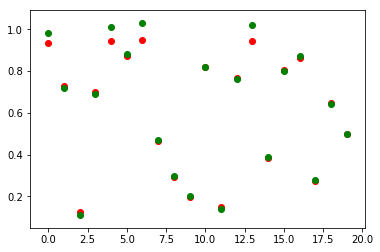

In [51]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),ytest,c='g')
plt.show()

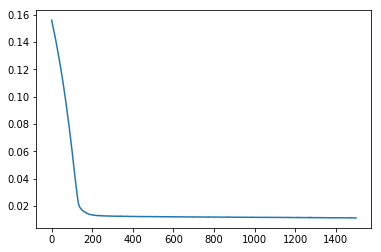

In [52]:
plt.plot(history.history['loss'])
plt.show()